# **BOOK RECOMENDATION SYSTEM**

## Import Library

In [1]:
import kagglehub
import os
import pandas as pd
# Import library
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity



In [2]:

path = kagglehub.dataset_download("ruchi798/bookcrossing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bookcrossing-dataset


## Load Dataset


path = kagglehub.dataset_download("ruchi798/bookcrossing-dataset")

print("Path to dataset files:", path)

In [3]:
books = pd.read_csv(path + "/Books Data with Category Language and Summary/Preprocessed_data.csv")
books.shape

(1031175, 19)

In [4]:
books.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1031175 non-null  int64  
 1   user_id              1031175 non-null  int64  
 2   location             1031175 non-null  object 
 3   age                  1031175 non-null  float64
 4   isbn                 1031175 non-null  object 
 5   rating               1031175 non-null  int64  
 6   book_title           1031175 non-null  object 
 7   book_author          1031174 non-null  object 
 8   year_of_publication  1031175 non-null  float64
 9   publisher            1031175 non-null  object 
 10  img_s                1031175 non-null  object 
 11  img_m                1031175 non-null  object 
 12  img_l                1031175 non-null  object 
 13  Summary              1031175 non-null  object 
 14  Language             1031175 non-null  object 
 15

In [6]:
books.describe().round(2)

,Unnamed: 0,user_id,age,rating,year_of_publication
count,1031175.00,1031175.00,1031175.00,1031175.00,1031175.00
mean,515587.00,140594.37,36.43,2.84,1995.28
std,297674.73,80524.44,10.35,3.85,7.31
min,0.00,2.00,5.00,0.00,1376.00
25%,257793.50,70415.00,31.00,0.00,1992.00
50%,515587.00,141210.00,34.74,0.00,1997.00
75%,773380.50,211426.00,41.00,7.00,2001.00
max,1031174.00,278854.00,99.00,10.00,2008.00


In [7]:
print("Jumlah missing values pada setiap kolom:", books.isnull().sum())

Jumlah missing values pada setiap kolom: Unnamed: 0                 0
user_id                    0
location                   0
age                        0
isbn                       0
rating                     0
book_title                 0
book_author                1
year_of_publication        0
publisher                  0
img_s                      0
img_m                      0
img_l                      0
Summary                    0
Language                   0
Category                   0
city                   14103
state                  22798
country                35374
dtype: int64


In [8]:
print("Jumlah duplikat:", books.duplicated().sum())

Jumlah duplikat: 0


In [9]:
print("Jumlah judul buku : ", books['book_title'].nunique())
print("Jumlah User :" , books['user_id'].nunique())
print("Rating buku", books['rating'].unique())
print("Jumlah kategori :", books['Category'].nunique())
print("Jumlah bahasa :", books['Language'].nunique())
print("Bahasa :", books['Language'].unique())

Jumlah judul buku :  241090
Jumlah User : 92107
Rating buku [ 0  5  8  9  7  6 10  4  3  2  1]
Jumlah kategori : 6448
Jumlah bahasa : 33
Bahasa : ['en' '9' 'de' 'fr' 'es' 'ca' 'it' 'da' 'nl' 'pt' 'gl' 'ro' 'no' 'el' 'ms'
 'la' 'ru' 'zh-CN' 'ga' 'pl' 'tl' 'th' 'ja' 'cy' 'fa' 'eo' 'gd' 'hi' 'vi'
 'ar' 'zh-TW' 'ko' 'sv']


In [10]:
print("Jumlah duplikat isbn:", books.duplicated(subset="isbn").sum())

Jumlah duplikat isbn: 761005


## Data Preperation

In [11]:
#hanya ambil buku yang berbahasa inggris
books = books[books['Language'] == 'en']

In [12]:
#delete duplikat isbn
books = books.drop_duplicates(subset="isbn")

In [13]:
#drop buku dengan rating 0
books = books[books['rating'] > 0]

In [14]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53212 entries, 1 to 1031173
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           53212 non-null  int64  
 1   user_id              53212 non-null  int64  
 2   location             53212 non-null  object 
 3   age                  53212 non-null  float64
 4   isbn                 53212 non-null  object 
 5   rating               53212 non-null  int64  
 6   book_title           53212 non-null  object 
 7   book_author          53212 non-null  object 
 8   year_of_publication  53212 non-null  float64
 9   publisher            53212 non-null  object 
 10  img_s                53212 non-null  object 
 11  img_m                53212 non-null  object 
 12  img_l                53212 non-null  object 
 13  Summary              53212 non-null  object 
 14  Language             53212 non-null  object 
 15  Category             53212 non-null  ob

In [15]:
#Drop missing value
books = books.dropna()


In [16]:
#Ambil sample 30000 baris agar tidak memperberat proses komputasi
books = books.sample(n=30000, random_state=42)

In [17]:
books.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
650081,650081,31826,"jasper, missouri, usa",54.0000,0764506749,10,The Internet for Dummies,John R. Levine,2000.0,John Wiley & Sons Inc,http://images.amazon.com/images/P/0764506749.0...,http://images.amazon.com/images/P/0764506749.0...,http://images.amazon.com/images/P/0764506749.0...,With the friendly advice and plain-English exp...,en,['Computers'],jasper,missouri,usa
909790,909790,133747,"gaithersburg, maryland, usa",28.0000,0060522399,8,On the Banks of Plum Creek (Little House),Laura Ingalls Wilder,2003.0,Avon,http://images.amazon.com/images/P/0060522399.0...,http://images.amazon.com/images/P/0060522399.0...,http://images.amazon.com/images/P/0060522399.0...,A new home When the Ingalls family decides to ...,en,['Juvenile Fiction'],gaithersburg,maryland,usa
587455,587455,23902,"london, england, united kingdom",34.7439,1565990455,6,1st Corinthians (Enduring Word Commentary),David Guzik,2001.0,Enduring Word Media,http://images.amazon.com/images/P/1565990455.0...,http://images.amazon.com/images/P/1565990455.0...,http://images.amazon.com/images/P/1565990455.0...,Some church problems have been around for thou...,en,['Religion'],london,england,united kingdom
844337,844337,94239,"merrimack, new hampshire, usa",34.7439,0688133398,10,Will the Real John Callahan Please Stand Up?: ...,John Callahan,1998.0,William Morrow & Company,http://images.amazon.com/images/P/0688133398.0...,http://images.amazon.com/images/P/0688133398.0...,http://images.amazon.com/images/P/0688133398.0...,The author presents an autobiographical scrapb...,en,['Biography & Autobiography'],merrimack,new hampshire,usa
1008631,1008631,240155,"westford, massachusetts, usa",40.0000,1562827502,5,"Birnbaum's Walt Disney World for Kids, by Kids...",Stephen Birnbaum,1993.0,Hyperion Books,http://images.amazon.com/images/P/1562827502.0...,http://images.amazon.com/images/P/1562827502.0...,http://images.amazon.com/images/P/1562827502.0...,"A vacation guide, created for and by kids, to ...",en,['Family recreation'],westford,massachusetts,usa


In [18]:
preperation = books.sort_values("isbn",ascending=True)
preperation = preperation.drop_duplicates(subset="isbn")
preperation = preperation.drop_duplicates(subset="book_title")
preperation = preperation.dropna()
preperation

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
826650,826650,85526,"victoria, british columbia, canada",36.0000,0001055607,8,Cereus Blooms At Night,Shani Mootoo,1994.0,Fairmount Books Ltd Remainders,http://images.amazon.com/images/P/0001055607.0...,http://images.amazon.com/images/P/0001055607.0...,http://images.amazon.com/images/P/0001055607.0...,"When Mala, old and notoriously crazy, arrives ...",en,['Adult child abuse victims'],victoria,british columbia,canada
1025127,1025127,266866,"northamptonshire, england, united kingdom",33.0000,0001374362,9,When It's Time for Bed (Collins Baby & Toddler...,Nick Butterworth,1994.0,Collins,http://images.amazon.com/images/P/0001374362.0...,http://images.amazon.com/images/P/0001374362.0...,http://images.amazon.com/images/P/0001374362.0...,Shows baby and his animal friends preparing fo...,en,['Animals'],northamptonshire,england,united kingdom
907137,907137,130973,"chester, cheshire, united kingdom",34.7439,0001856367,9,The Collins Book of Ballet and Dance,Jean Ure,1996.0,HarperCollins Publishers,http://images.amazon.com/images/P/0001856367.0...,http://images.amazon.com/images/P/0001856367.0...,http://images.amazon.com/images/P/0001856367.0...,A collection of short stories about young peop...,en,['Ballet'],chester,cheshire,united kingdom
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
609535,609535,26583,"dollard des ormeaux, quebec, canada",34.7439,0002006588,8,Vancouver,David Cruise,2003.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002006588.0...,http://images.amazon.com/images/P/0002006588.0...,http://images.amazon.com/images/P/0002006588.0...,A fascinating cast of characters populate the ...,en,['Vancouver (B.C.)'],dollard des ormeaux,quebec,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320134,320134,7181,"oviedo, asturias, spain",24.0000,9875500534,10,Bodas de Sangre,Federico Garcia Lorca,2001.0,Errepar,http://images.amazon.com/images/P/9875500534.0...,http://images.amazon.com/images/P/9875500534.0...,http://images.amazon.com/images/P/9875500534.0...,"&quot;Bodas de sangre (1932), primera tragedia...",en,['Weddings'],oviedo,asturias,spain
1024480,1024480,265591,"sevilla, sevilla, spain",34.7439,987550095X,10,Hojas de Hierba,Walt Whitman,2002.0,Errepar,http://images.amazon.com/images/P/987550095X.0...,http://images.amazon.com/images/P/987550095X.0...,http://images.amazon.com/images/P/987550095X.0...,"Walt Whitman, inaugurador del verso libre pens...",en,['Poetry'],sevilla,sevilla,spain
992051,992051,216099,"ciudad colón, san josé, costa rica",34.7439,9968746037,6,Exploring Costa Rica 2003 (Exploring Costa Ric...,Penton Overseas,2002.0,Tico Times,http://images.amazon.com/images/P/9968746037.0...,http://images.amazon.com/images/P/9968746037.0...,http://images.amazon.com/images/P/9968746037.0...,This year&#39;s guide has more town maps and a...,en,['Travel'],ciudad colón,san josé,costa rica
1015479,1015479,249140,"kuala lumpur, wilayah persekutuan, malaysia",46.0000,9971692724,7,Life Is Not Complete Without Shopping: Consump...,Chua Beng Huat,2003.0,Singapore University Press,http://images.amazon.com/images/P/9971692724.0...,http://images.amazon.com/images/P/9971692724.0...,http://images.amazon.com/images/P/9971692724.0...,This book is a series of essays by Singaporean...,en,['Social Science'],kuala lumpur,wilayah persekutuan,malaysia


In [19]:
#Mengkonversi data dalam kolom menjadi list
book_id = preperation['isbn'].tolist()
book_title = preperation['book_title'].tolist()
category = preperation['Category'].tolist()

In [20]:
# Membuat dictionary untuk data
book_new = pd.DataFrame({
    'isbn': book_id,
    'book_title': book_title,
    'category': category
})


## Content based Filtering

In [21]:
data  = book_new

In [22]:

# Inisialisasi TfidfVectorizer
tfidf = TfidfVectorizer()

# Melakukan perhitungan idf pada data category
tfidf.fit(data['category'])
tfidf.get_feature_names_out()

array(['0islands', '101', '11', ..., 'états', 'études', 'étudiants'],
      dtype=object)

In [23]:

tfidf_matrix = tfidf.fit_transform(data['category'])
# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(29428, 2319)

In [24]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf.get_feature_names_out(),
    index=data.book_title
).sample(22, axis=1).sample(10, axis=0)

,adaptability,adolescence,apache,arab,macro,recycling,papacy,custody,dietary,hell,...,arizona,19e,sonnets,beckett,men,marriage,1900,keys,aquariums,interactions
book_title,,,,,,,,,,,,,,,,,,,,,
The Woman from Browhead,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Forsaken,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"In Search of Stones: A Pilgrimage of Faith, Reason, and Discovery",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Still Glides the Stream (Oxford Paperbacks ; 366),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Music and Imagination. (Charles Eliot Norton Lectures),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chicken Soup for the Teacher's Soul: Stories to Open the Hearts and Rekindle the Spirit of Educators,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Say When : A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Perfumes, Splashes & Colognes: Discovering and Crafting Your Personal Fragrances",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brighter Sun (Longman Caribbean Writer Series),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [27]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['book_title'], columns=data['book_title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap juful buku
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (29428, 29428)


book_title,"Three Genres: The Writing of Poetry, Fiction, and Drama",The Devil's Notebook,"Before You Get To Baby... (Silhouette Romance, No. 1583)",A Closer Look at the Evidence,The Runes of Elfland
book_title,,,,,
Her Blood Is Gold: Celebrating the Power of Menstruation,0.0,0.0,0.000000,0.0,0.000000
Neanderthal: A Novel,0.0,0.0,1.000000,0.0,1.000000
Puppet Child,0.0,0.0,1.000000,0.0,1.000000
The Sane Society (Routledge Classics S.),0.0,0.0,0.000000,0.0,0.000000
Pirates and Buccaneers Coloring Book,0.0,0.0,0.000000,0.0,0.000000
The Autobiography of Alice B. Toklas,0.0,0.0,0.000000,0.0,0.000000
Where Rivers Change Direction,0.0,0.0,0.000000,0.0,0.000000
Remember Me 3 The Last Story,0.0,0.0,0.488904,0.0,0.488904
Cloud Nine,0.0,0.0,1.000000,0.0,1.000000


In [28]:
def book_recommendations(nama_buku, similarity_data=cosine_sim_df, items=data[['book_title', 'category']], k=10):
    """
    Rekomendasi buku berdasarkan kemiripan dataframe

    Parameter:
    ---
    nama_buku : tipe data string (str)
                Nama Buku (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan buku sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_buku].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_buku agar judul buku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_buku, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [29]:
book_recommendations('Accidental City: The Transformation of Toronto')

,book_title,category
0,Hudson River School: Masterworks from the Wads...,['Architecture']
1,Period Rooms in the Metropolitan Museum of Art,['Architecture']
2,Scandinavian Country (Architecture and Design ...,['Architecture']
3,Treehouses: The Art and Craft of Living Out on...,['Architecture']
4,Paris Then & Now (Then and Now International S...,['Architecture']
5,The New American Cottage: Innovations in Small...,['Architecture']
6,Nightmares in the Sky: Gargoyles and Grotesques,['Architecture']
7,The Cathedral Builders (Harper colophon books),['Architecture']
8,"English Country Cottage: Interiors, Details & ...",['Architecture']
9,Hints on Household Taste : The Classic Handboo...,['Architecture']


## Collaborative Filtering

In [30]:
df =books[books['rating']>0]

In [31]:
df

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
650081,650081,31826,"jasper, missouri, usa",54.0000,0764506749,10,The Internet for Dummies,John R. Levine,2000.0,John Wiley & Sons Inc,http://images.amazon.com/images/P/0764506749.0...,http://images.amazon.com/images/P/0764506749.0...,http://images.amazon.com/images/P/0764506749.0...,With the friendly advice and plain-English exp...,en,['Computers'],jasper,missouri,usa
909790,909790,133747,"gaithersburg, maryland, usa",28.0000,0060522399,8,On the Banks of Plum Creek (Little House),Laura Ingalls Wilder,2003.0,Avon,http://images.amazon.com/images/P/0060522399.0...,http://images.amazon.com/images/P/0060522399.0...,http://images.amazon.com/images/P/0060522399.0...,A new home When the Ingalls family decides to ...,en,['Juvenile Fiction'],gaithersburg,maryland,usa
587455,587455,23902,"london, england, united kingdom",34.7439,1565990455,6,1st Corinthians (Enduring Word Commentary),David Guzik,2001.0,Enduring Word Media,http://images.amazon.com/images/P/1565990455.0...,http://images.amazon.com/images/P/1565990455.0...,http://images.amazon.com/images/P/1565990455.0...,Some church problems have been around for thou...,en,['Religion'],london,england,united kingdom
844337,844337,94239,"merrimack, new hampshire, usa",34.7439,0688133398,10,Will the Real John Callahan Please Stand Up?: ...,John Callahan,1998.0,William Morrow & Company,http://images.amazon.com/images/P/0688133398.0...,http://images.amazon.com/images/P/0688133398.0...,http://images.amazon.com/images/P/0688133398.0...,The author presents an autobiographical scrapb...,en,['Biography & Autobiography'],merrimack,new hampshire,usa
1008631,1008631,240155,"westford, massachusetts, usa",40.0000,1562827502,5,"Birnbaum's Walt Disney World for Kids, by Kids...",Stephen Birnbaum,1993.0,Hyperion Books,http://images.amazon.com/images/P/1562827502.0...,http://images.amazon.com/images/P/1562827502.0...,http://images.amazon.com/images/P/1562827502.0...,"A vacation guide, created for and by kids, to ...",en,['Family recreation'],westford,massachusetts,usa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991989,991989,216012,"clevelad, ohio, usa",34.0000,1583140735,8,Secret Love (Arabesque),Brenda Jackson,2000.0,Bet Books,http://images.amazon.com/images/P/1583140735.0...,http://images.amazon.com/images/P/1583140735.0...,http://images.amazon.com/images/P/1583140735.0...,FOREVER LOVE Jake doesn&#39;t have time to bab...,en,['Fiction'],clevelad,ohio,usa
692485,692485,37712,"cincinnati, ohio, usa",23.0000,0435905481,9,The River Between,Ngugi wa Thiong'o,1990.0,Heinemann,http://images.amazon.com/images/P/0435905481.0...,http://images.amazon.com/images/P/0435905481.0...,http://images.amazon.com/images/P/0435905481.0...,This book explores life on the Makuyu and Kame...,en,['Africa'],cincinnati,ohio,usa
804205,804205,75591,"charleston, west virginia, usa",33.0000,0440228328,8,A Killing Frost,John Marsden,1999.0,Laurel Leaf Library,http://images.amazon.com/images/P/0440228328.0...,http://images.amazon.com/images/P/0440228328.0...,http://images.amazon.com/images/P/0440228328.0...,Everyone is fighting to survive. A Killing Fro...,en,['Juvenile Fiction'],charleston,west virginia,usa
624233,624233,28647,"aspinwall, pennsylvania, usa",34.7439,0316159239,5,Gone a Novel,Kit Craig,1992.0,Little Brown & Co,http://images.amazon.com/images/P/0316159239.0...,http://images.amazon.com/images/P/0316159239.0...,http://images.amazon.com/images/P/0316159239.0...,Story of the Hale family facing destruction at...,en,['Fiction'],aspinwall,pennsylvania,usa


In [32]:
user_ids = df['user_id'].unique().tolist()
print('list user_id: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [31826, 133747, 23902, 94239, 240155, 125798, 235105, 148966, 93629, 104168, 208791, 2766, 218580, 104429, 36299, 155916, 211426, 78422, 7346, 59269, 162200, 262351, 117384, 8067, 166141, 141902, 28454, 162639, 156534, 153662, 20916, 49792, 36554, 203860, 32211, 110620, 171104, 189835, 87141, 12824, 10819, 71831, 1048, 238358, 86947, 16795, 214334, 49900, 224904, 88693, 71694, 93047, 231896, 68156, 58782, 95261, 62592, 6242, 116122, 60787, 20680, 48498, 248615, 95991, 23872, 113270, 33179, 169644, 236948, 7913, 266419, 159455, 93039, 69078, 247521, 13396, 89891, 388, 85993, 60244, 153284, 75819, 189973, 156150, 114178, 60251, 35836, 24204, 55732, 6239, 213141, 247626, 98391, 204124, 35445, 100454, 216795, 164465, 2363, 263601, 163759, 159259, 47975, 36849, 101851, 6968, 1499, 68491, 58594, 39345, 169681, 88620, 3282, 125519, 75783, 101550, 232131, 131032, 169698, 114865, 71902, 78973, 126604, 225379, 7286, 63923, 100782, 214459, 184465, 8135, 197659, 72352, 87964, 24234,

In [33]:
book_ids = df['isbn'].unique().tolist()

# Melakukan proses encoding isbn
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}

# Melakukan proses encoding angka ke isbn
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

In [34]:
# Mapping user_idke dataframe user
df['user'] = df['user_id'].map(user_to_user_encoded)

# Mapping isbn ke dataframe buku
df['book'] = df['isbn'].map(book_to_book_encoded)

In [35]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah buku
num_book = len(book_encoded_to_book)
print(num_book)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of Books: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

10396
30000
Number of User: 10396, Number of Books: 30000, Min Rating: 1.0, Max Rating: 10.0


In [36]:
# Membuat variabel x untuk mencocokkan data user dan book menjadi satu value
x = df[['user', 'book']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[    0     0]
 [    1     1]
 [    2     2]
 ...
 [  256 29997]
 [10395 29998]
 [ 6466 29999]] [1.         0.77777778 0.55555556 ... 0.77777778 0.44444444 0.66666667]


In [37]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_book = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_book + user_bias + book_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [38]:
model = RecommenderNet(num_users, num_book, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [48]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.5928 - root_mean_squared_error: 0.2217 - val_loss: 0.6681 - val_root_mean_squared_error: 0.2978
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5433 - root_mean_squared_error: 0.1751 - val_loss: 0.6680 - val_root_mean_squared_error: 0.2977
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.5438 - root_mean_squared_error: 0.1774 - val_loss: 0.6678 - val_root_mean_squared_error: 0.2976
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5430 - root_mean_squared_error: 0.1759 - val_loss: 0.6676 - val_root_mean_squared_error: 0.2975
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.5432 - root_mean_squared_error: 0.1752 - val_loss: 0.6675 - val_root_mean_squared_error: 0.2973
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5455 - root_mean_squared_error: 0.1768 - val_loss: 0.6673 - val_root_mean_squared_error: 0.2972
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 24m

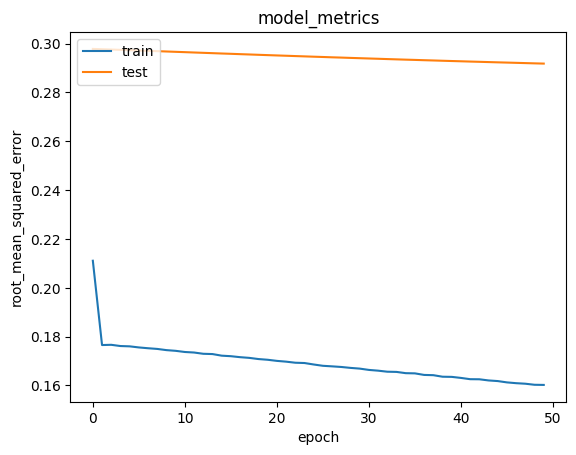

In [49]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
book_df = books
df = df

# Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]
book_read_by_user = df[df.user_id == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
book_not_read = book_df[~book_df['isbn'].isin(book_read_by_user.isbn.values)]['isbn']
book_not_read = list(
    set(book_not_read)
    .intersection(set(book_to_book_encoded.keys()))
)

book_not_read = [[book_to_book_encoded.get(x)] for x in book_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)

In [47]:
# Predict ratings untuk buku yang belum dibaca pengguna
ratings = model.predict(user_book_array).flatten()

# Ambil 10 indeks dengan rating tertinggi (pastikan 10 buku unik)
top_ratings_indices = ratings.argsort()[-10:][::-1]

# Kumpulkan ISBN rekomendasi, pastikan tidak ada duplikat
seen_isbns = set()
recommended_book_ids = []

for x in top_ratings_indices:
    book_id = book_encoded_to_book.get(book_not_read[x][0])
    # Tambahkan hanya ISBN yang belum ada di `seen_isbns`
    if book_id not in seen_isbns:
        seen_isbns.add(book_id)
        recommended_book_ids.append(book_id)
    # Hentikan loop jika sudah 10 ISBN unik
    if len(recommended_book_ids) == 10:
        break

# Tampilkan rekomendasi
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Book with high ratings from user')
print('----' * 8)

top_book_user = (
    book_read_by_user.sort_values(by='rating', ascending=False)
    .head(5)
    .isbn.values
)

book_df_rows = book_df[book_df['isbn'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.book_title, ':', row.Category)

print('----' * 8)
print('Top 10 Book Recommendation')
print('----' * 8)

# Ambil data buku rekomendasi dan pastikan tidak ada duplikat ISBN
recommended_book = book_df[book_df['isbn'].isin(recommended_book_ids)].drop_duplicates(subset='isbn')

# Tampilkan hanya 10 buku pertama (jika ada duplikasi di data sumber)
for row in recommended_book.head(10).itertuples():
    print(row.book_title, ':', row.Category)

930/930 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Showing recommendations for users: 76499
Book with high ratings from user
--------------------------------
I May Not Get There With You : The True Martin Luther King Jr : ['Biography & Autobiography']
Daughters of the Shtetl: Life and Labor in the Immigrant Generation : ['Business & Economics']
The Ultimate Terrorists : ['Political Science']
The Whiskey Rebellion: Frontier Epilogue to the American Revolution : ['History']
Mass Spectrometry : Principles and Applications : ['Science']
--------------------------------
Top 10 Book Recommendation
--------------------------------
Damia (Rowan) : ['Fiction']
Muletrain to Maggody: An Arly Hanks Mystery : ['Fiction']
Sanji and the Baker : ['Juvenile Fiction']
Night of the Shifter's Moon (Unicorns of Balinor, 7) : ['Fantasy']
At the Japanese Table: New and Traditional Recipes : ['Cookery, Japanese']
Addie and the Laird: Bogus Brides (Ballad Romances) : ['Fiction']
The Long Winter : ['Juvenile Fiction']
Po